## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. ANN data preparation
#### 4. ANN Model (Unscaled Data)
#### 5. ANN Model (Scaled Data)
#### 6. ANN Model (Scaled data - Iterations)

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Maching Learning\Climate_Win'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Maching Learning\\Climate_Win'

In [4]:
# Import climatewin original data
df_cw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [5]:
# Check output
df_cw.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
# Check shape
df_cw.shape

(22950, 170)

In [7]:
# Import climatewin prediction data
df_cw_pred = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
# Check output
df_cw_pred.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check shape
df_cw_pred.shape

(22950, 16)

## 3. ANN data preparation

In [12]:
#Reduce dataframe to just the temperature variables (only include weather stations in df_cw_pred)
df_cw_reduced = df_cw[['DATE', 'MONTH',
              'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
              'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
              'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
              'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
              'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
              'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
              'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
              'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
              'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
              'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
              'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
              'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
              'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
              'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
              'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]

In [13]:
# Check output
df_cw_reduced.head()

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4


In [14]:
# Check shape
df_cw_reduced.shape

(22950, 47)

In [15]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_cw_reduced.drop(['DATE', 'MONTH'], axis=1)
y = df_cw_pred.drop(['DATE'], axis=1)

In [16]:
# Check X and y shape
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [17]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Check shape for train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## 4. ANN Model (Unscaled Data)

In [19]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [20]:
y_pred = mlp.predict(X_train)
print('Train accuracy score: ', accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score: ', accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.451487334417848
Test accuracy score:  0.4578250261415127


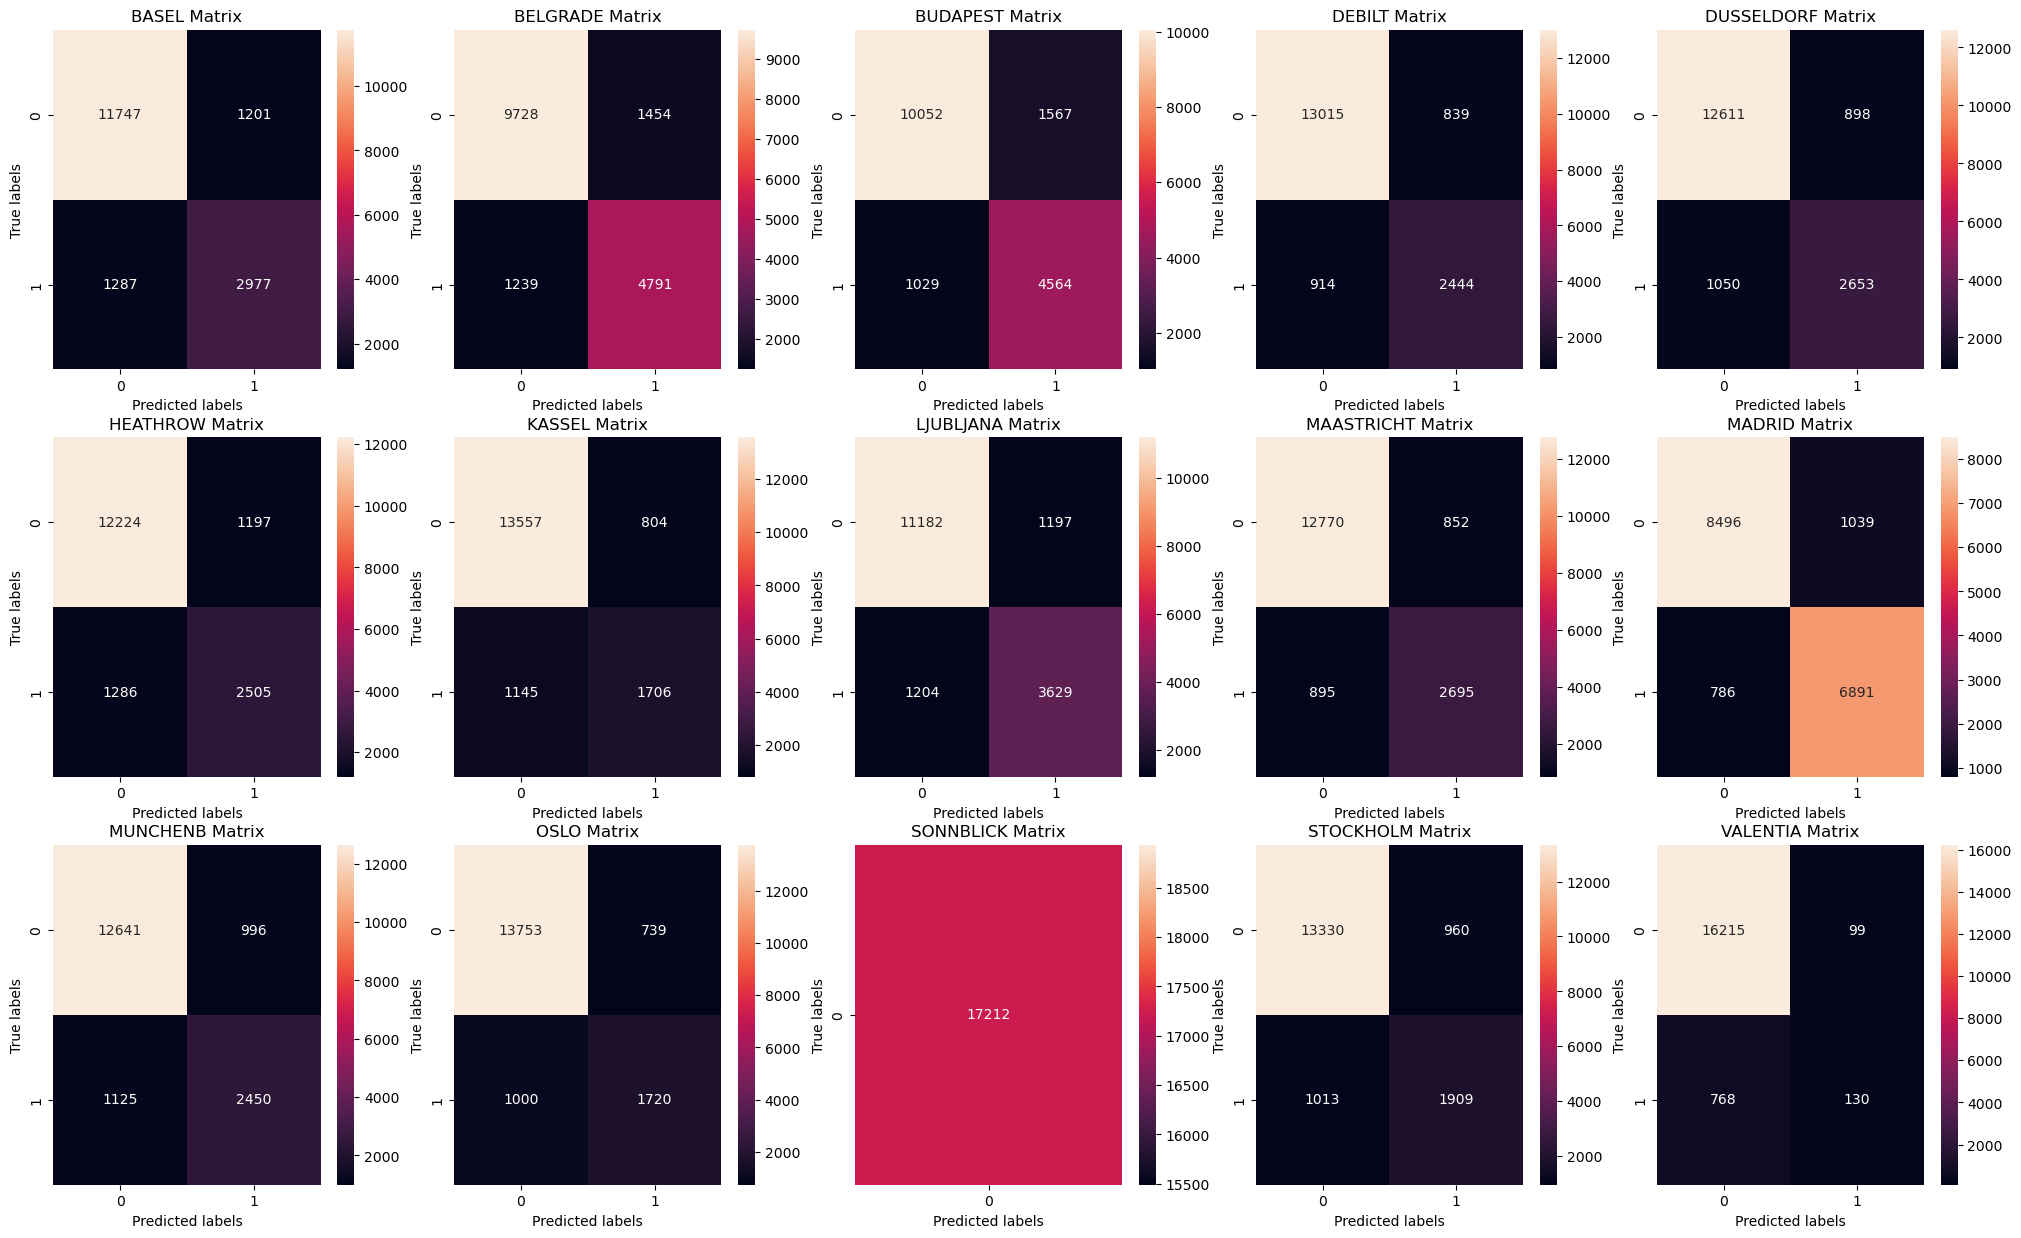

In [22]:
#Confusion matrix based Training data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

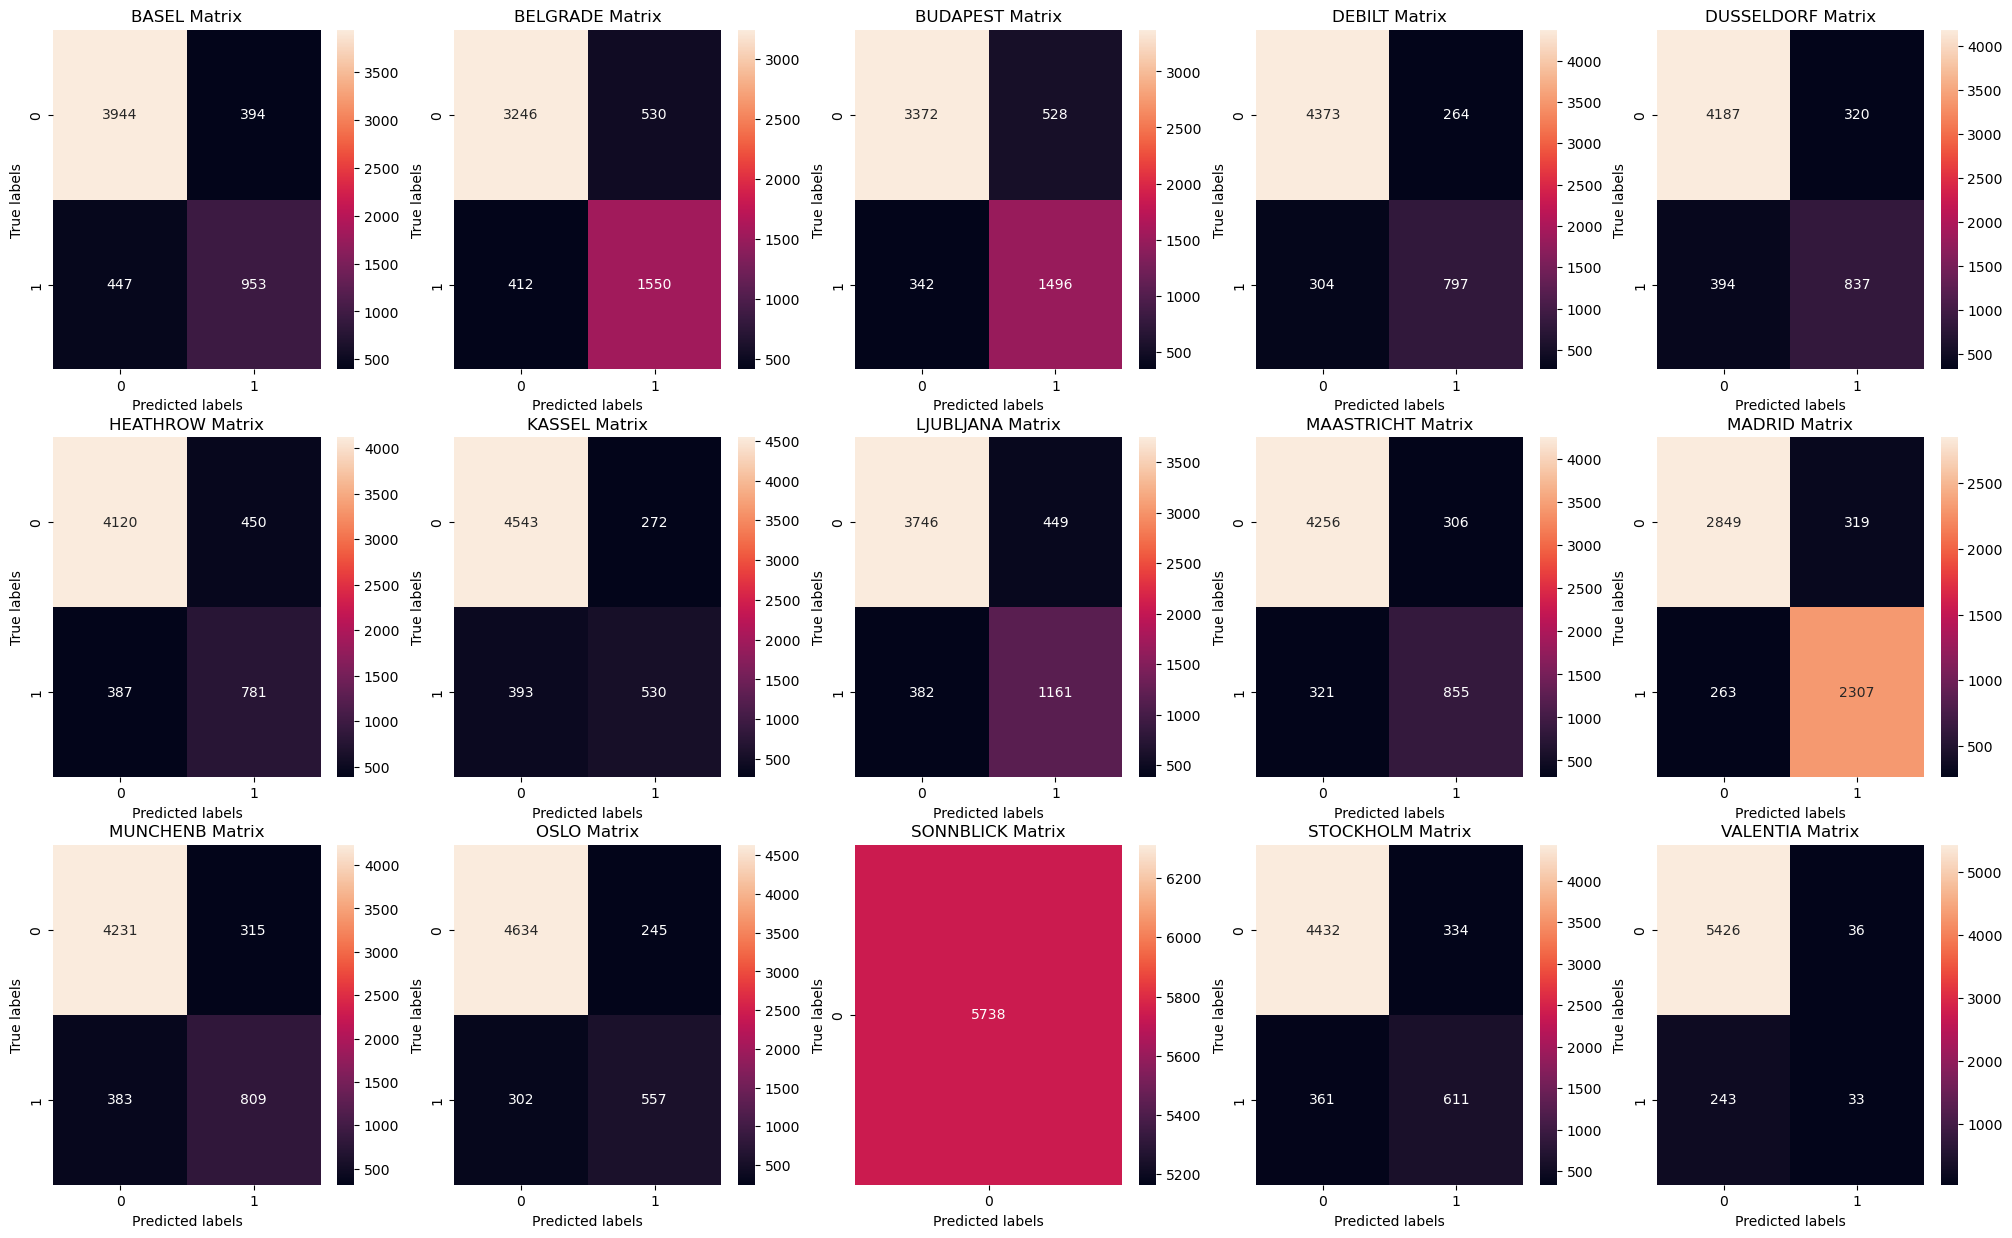

In [23]:
#Confusion matrix for Test data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## 5. ANN Model (Scaled Data)

In [24]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [25]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [32]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [33]:
y_pred = mlp.predict(X_train_df)
print('Train accuracy score: ', accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print('Test accuracy score: ', accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.46775505461306066
Test accuracy score:  0.4750784245381666


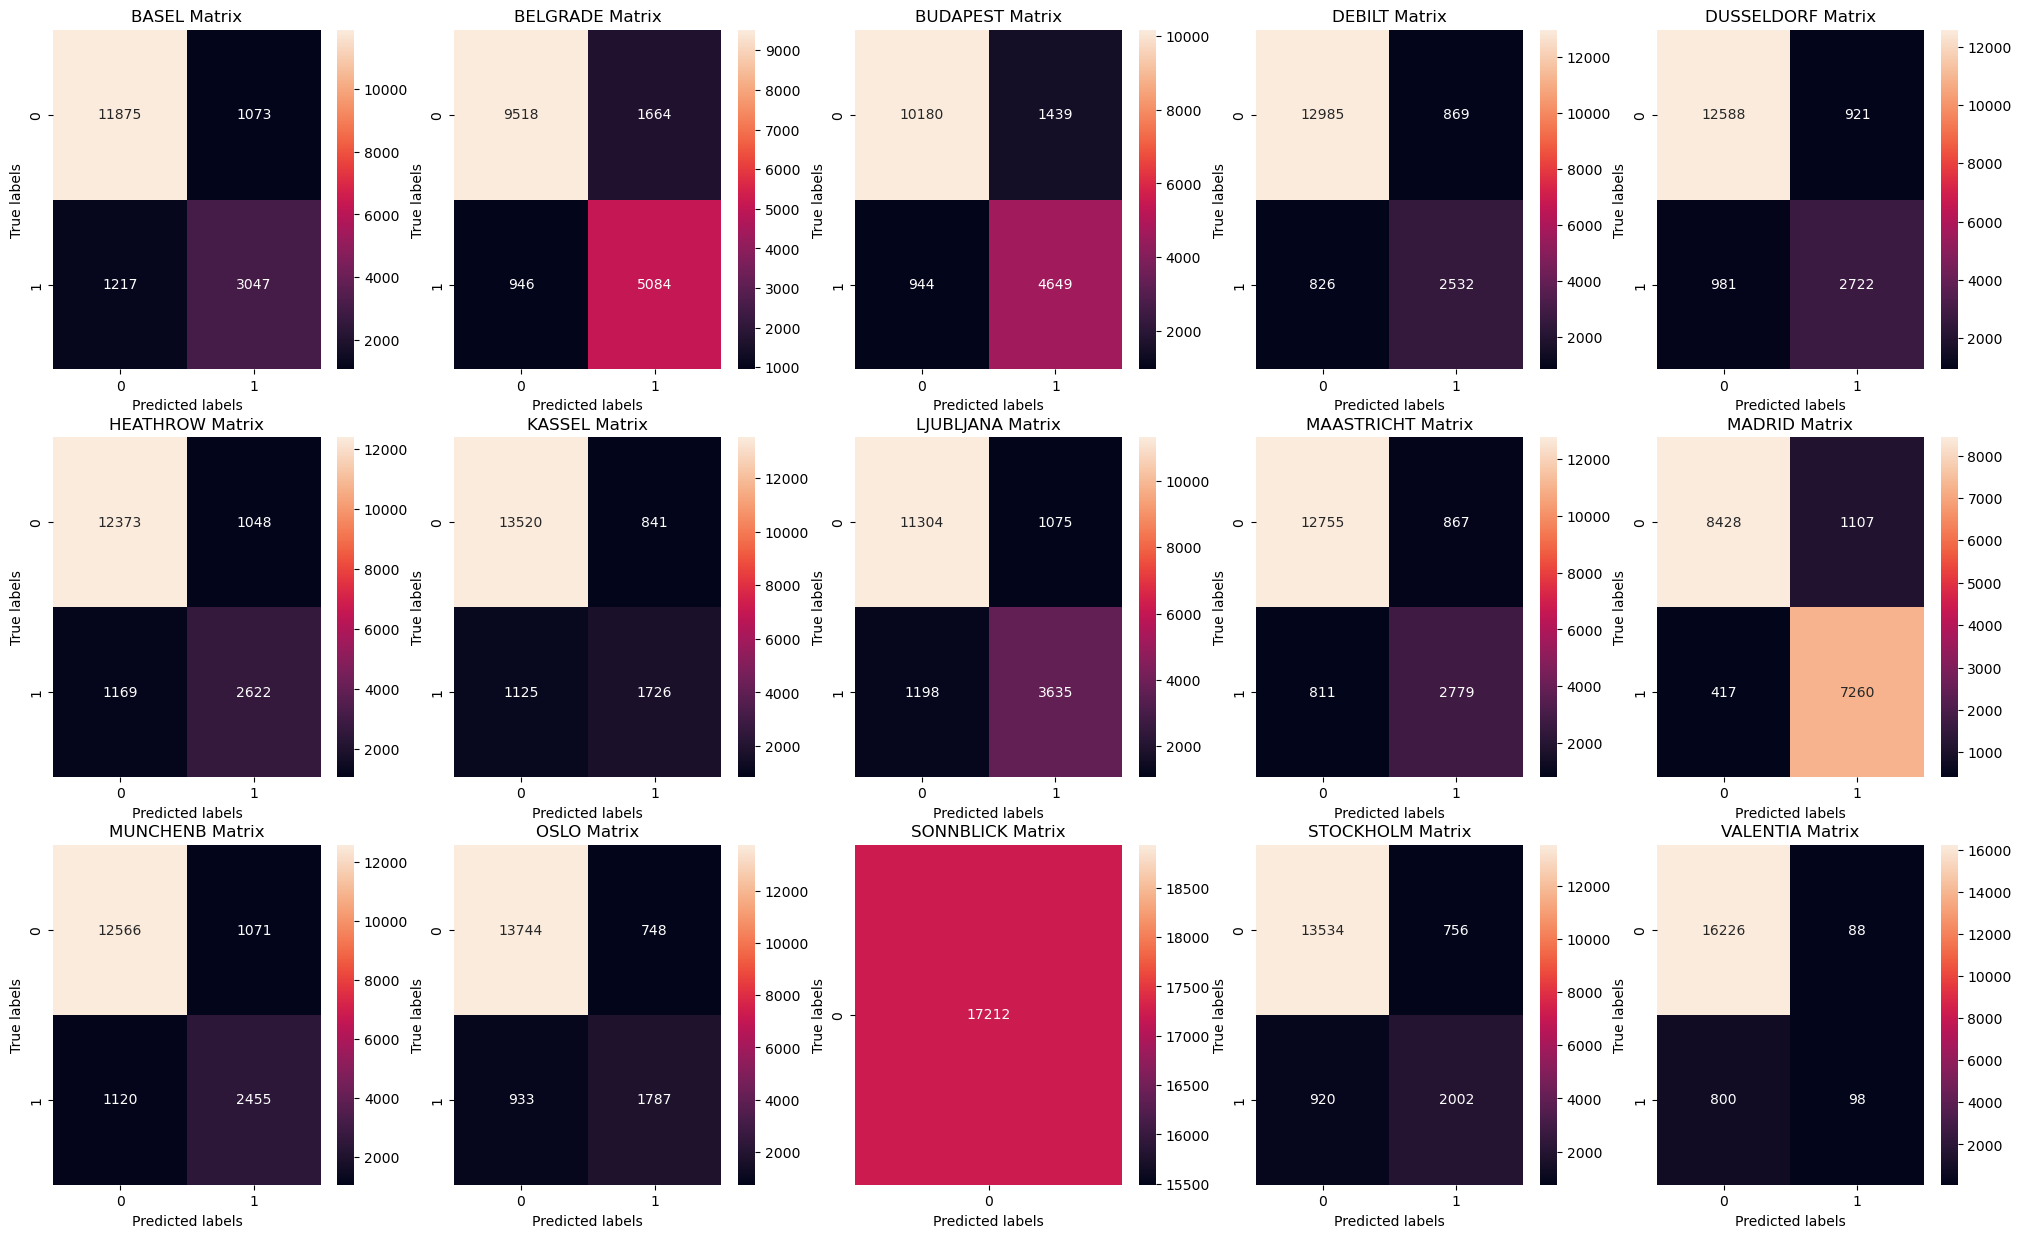

In [34]:
#Confusion matrix based Training data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

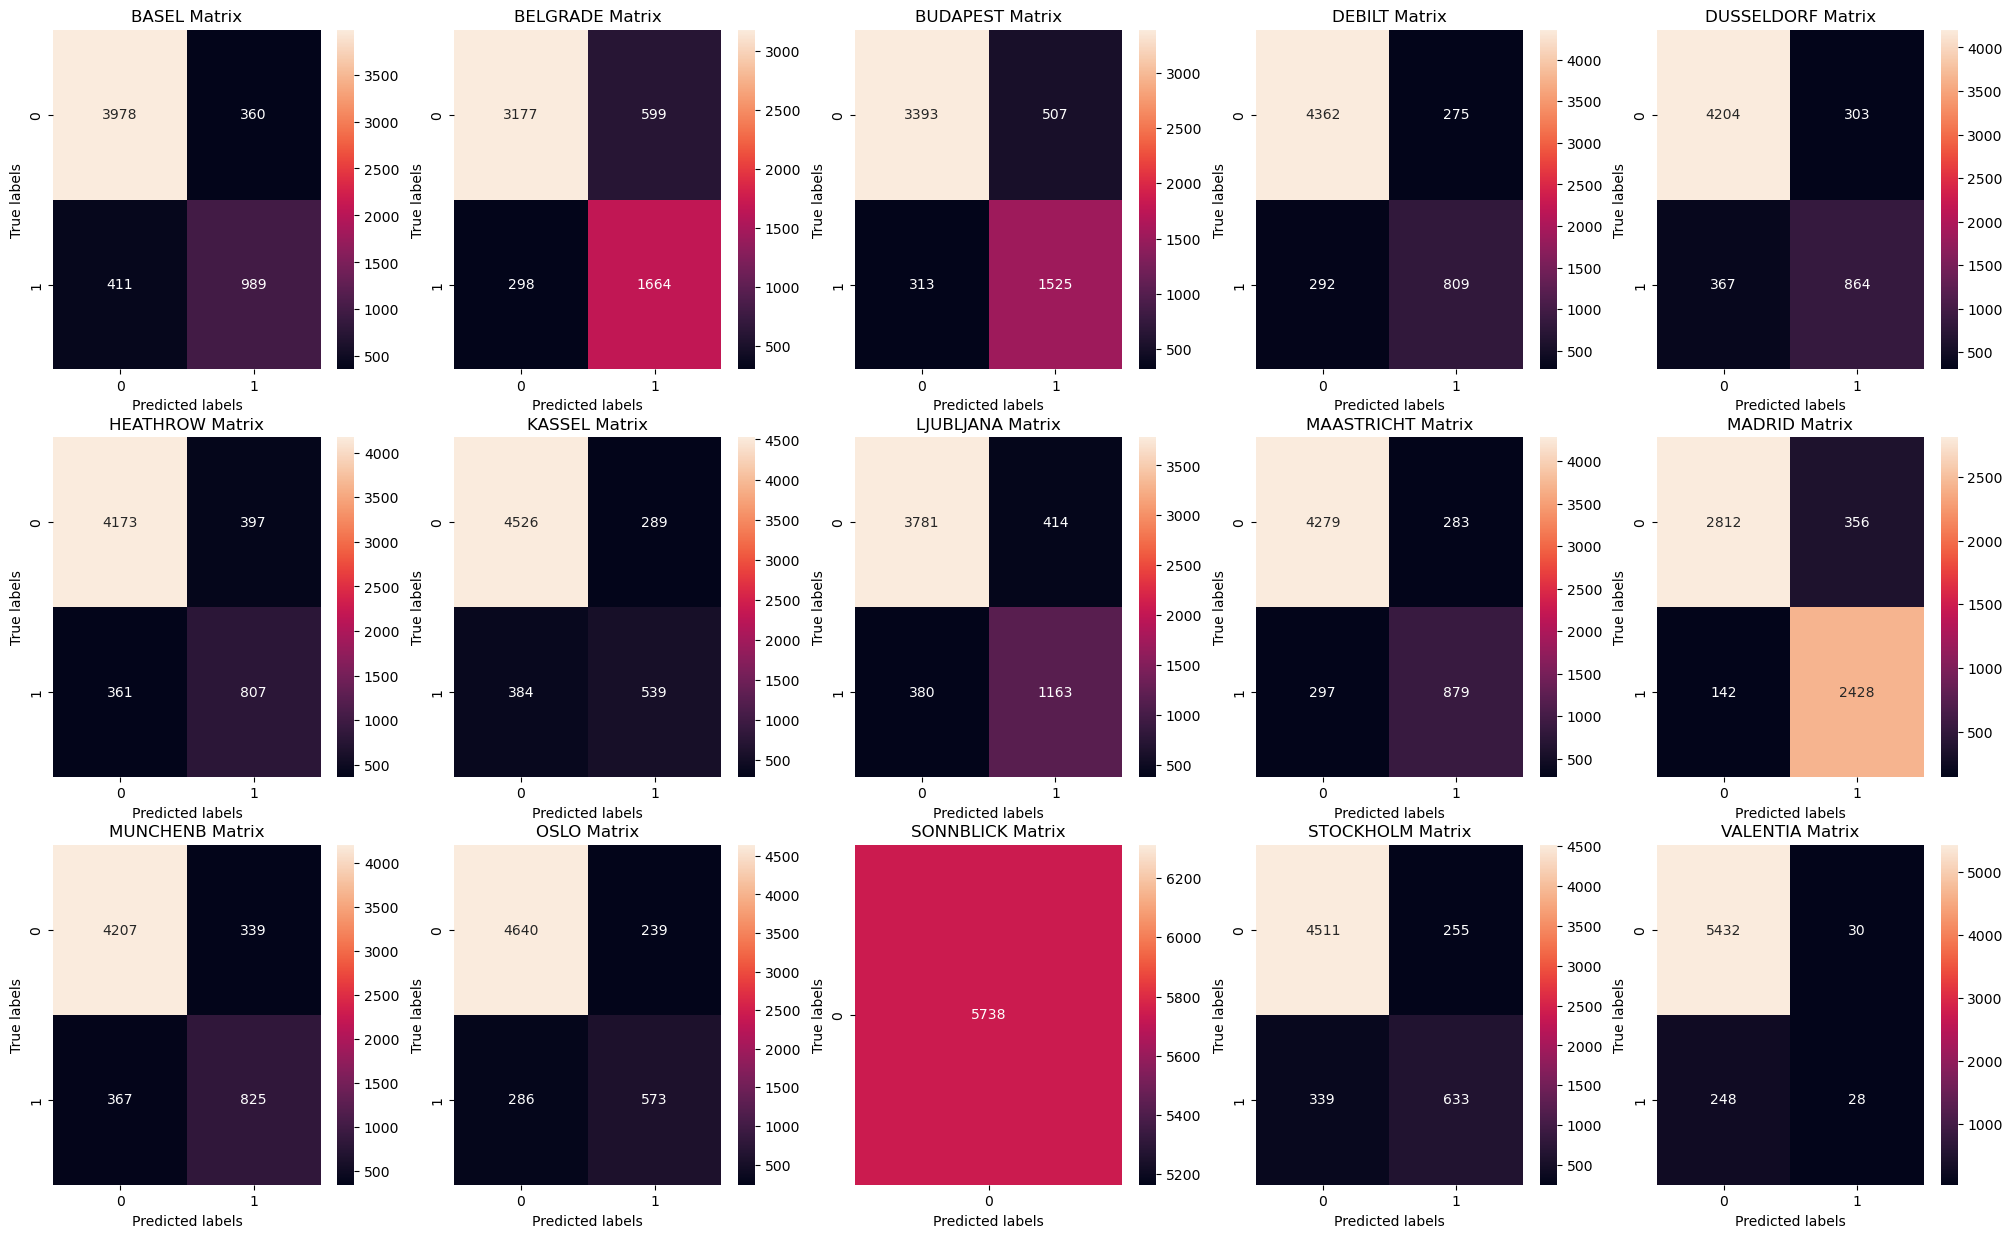

In [35]:
#Confusion matrix for Test data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Scaled data have slightly better accuracy as compared to unscaled data.
#### Unscaled data Vs Scaled data
- Train accuracy score:  0.4515(Unscaled), 0.4678 (Scaled)
- Test accuracy score:  0.4578(Unscaled), 0.4751 (Scaled)

## 6. ANN Model (Scaled data - Iterations)

### 6.1. Iteration Run 1: hidden_layer_sizes=(20, 20, 20), max_iter=1000, tol=0.00001

In [36]:
#Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, tol=1e-05)

In [37]:
y_pred = mlp.predict(X_train_df)
print('Train accuracy score: ', accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print('Test accuracy score: ', accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.5143504531722054
Test accuracy score:  0.5165562913907285


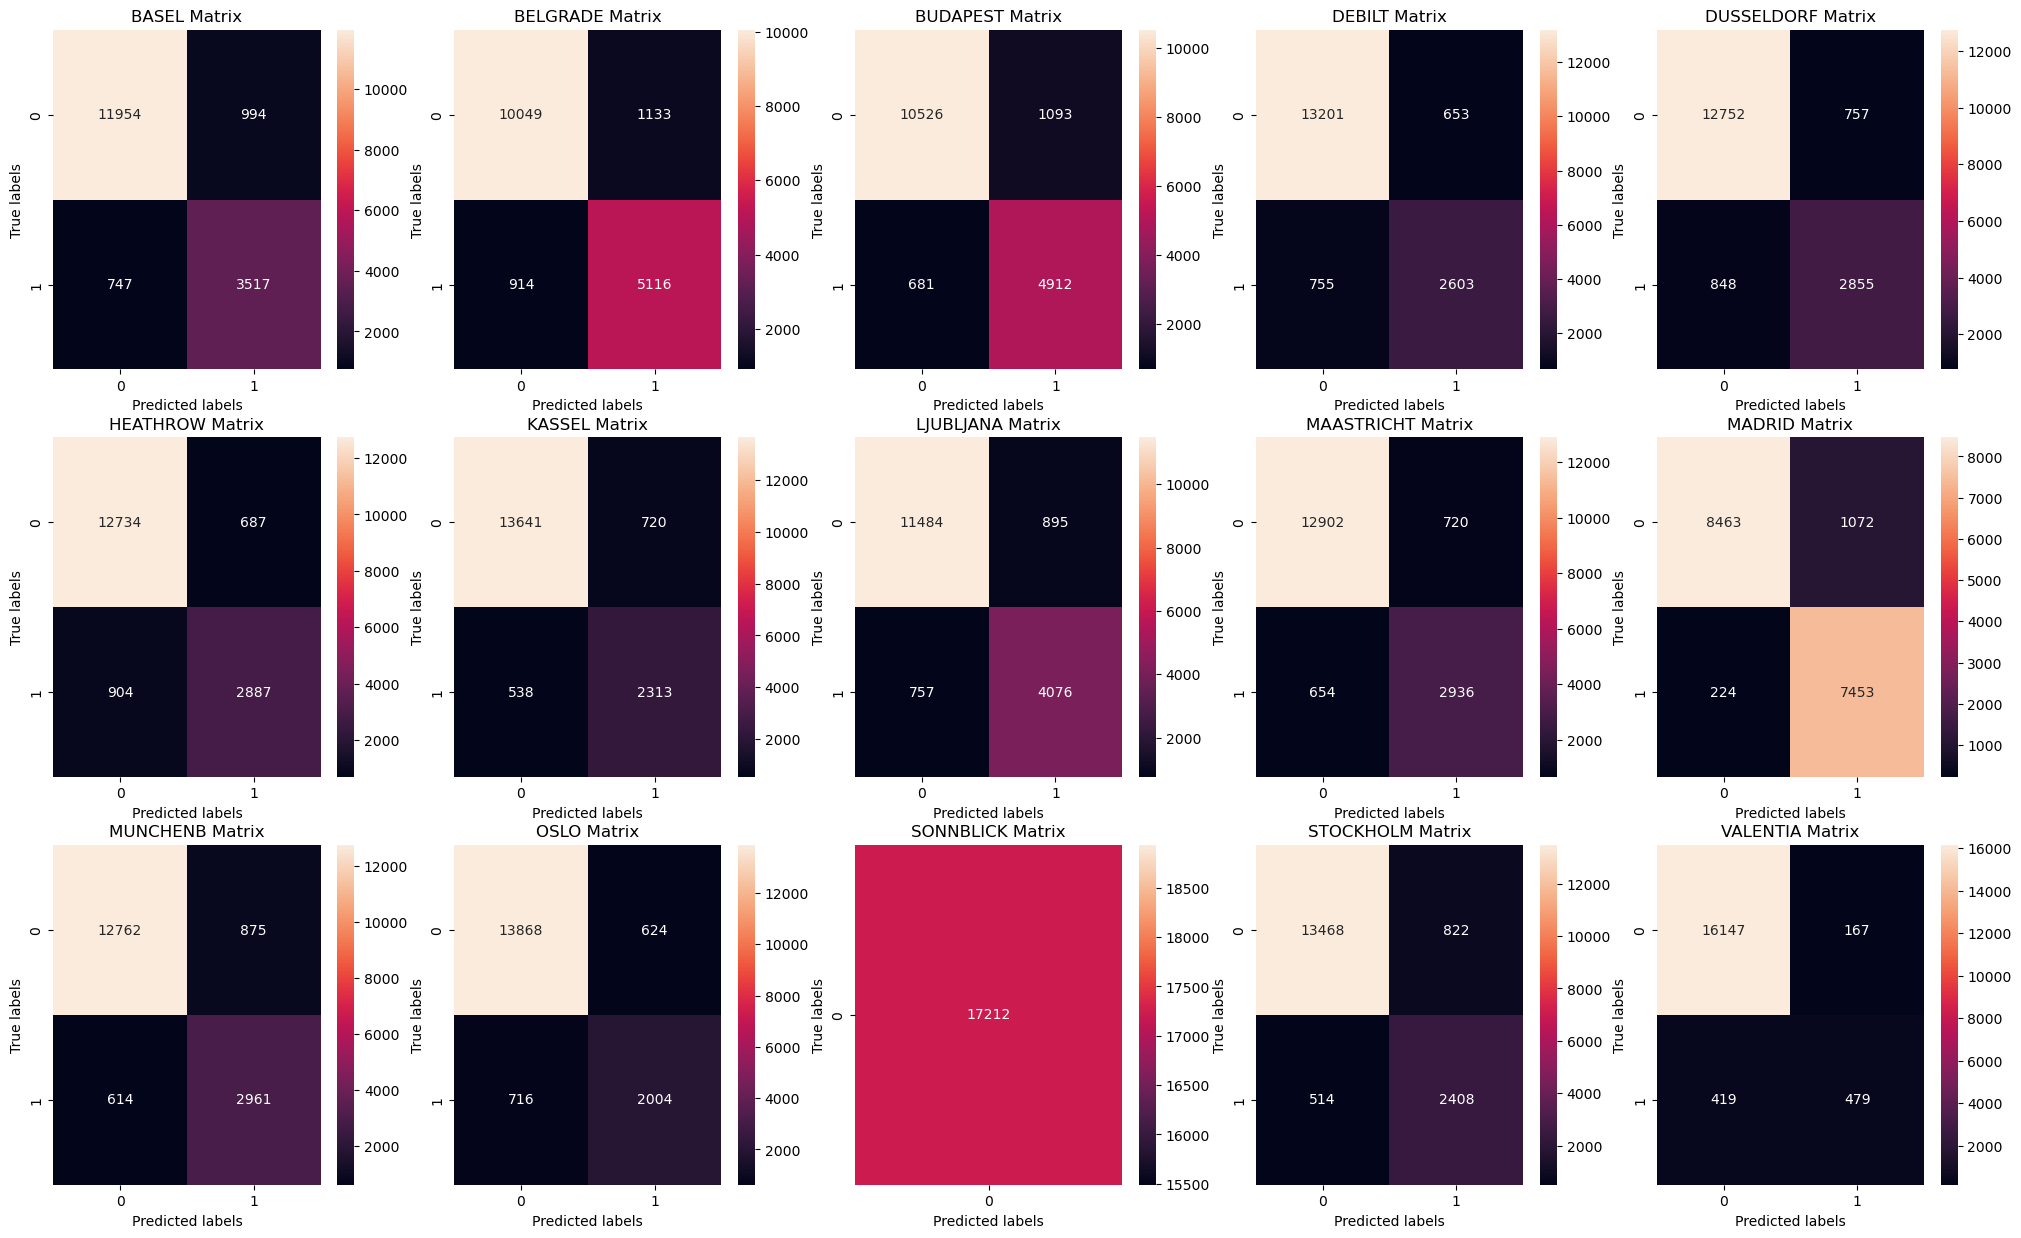

In [38]:
#Confusion matrix based Training data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

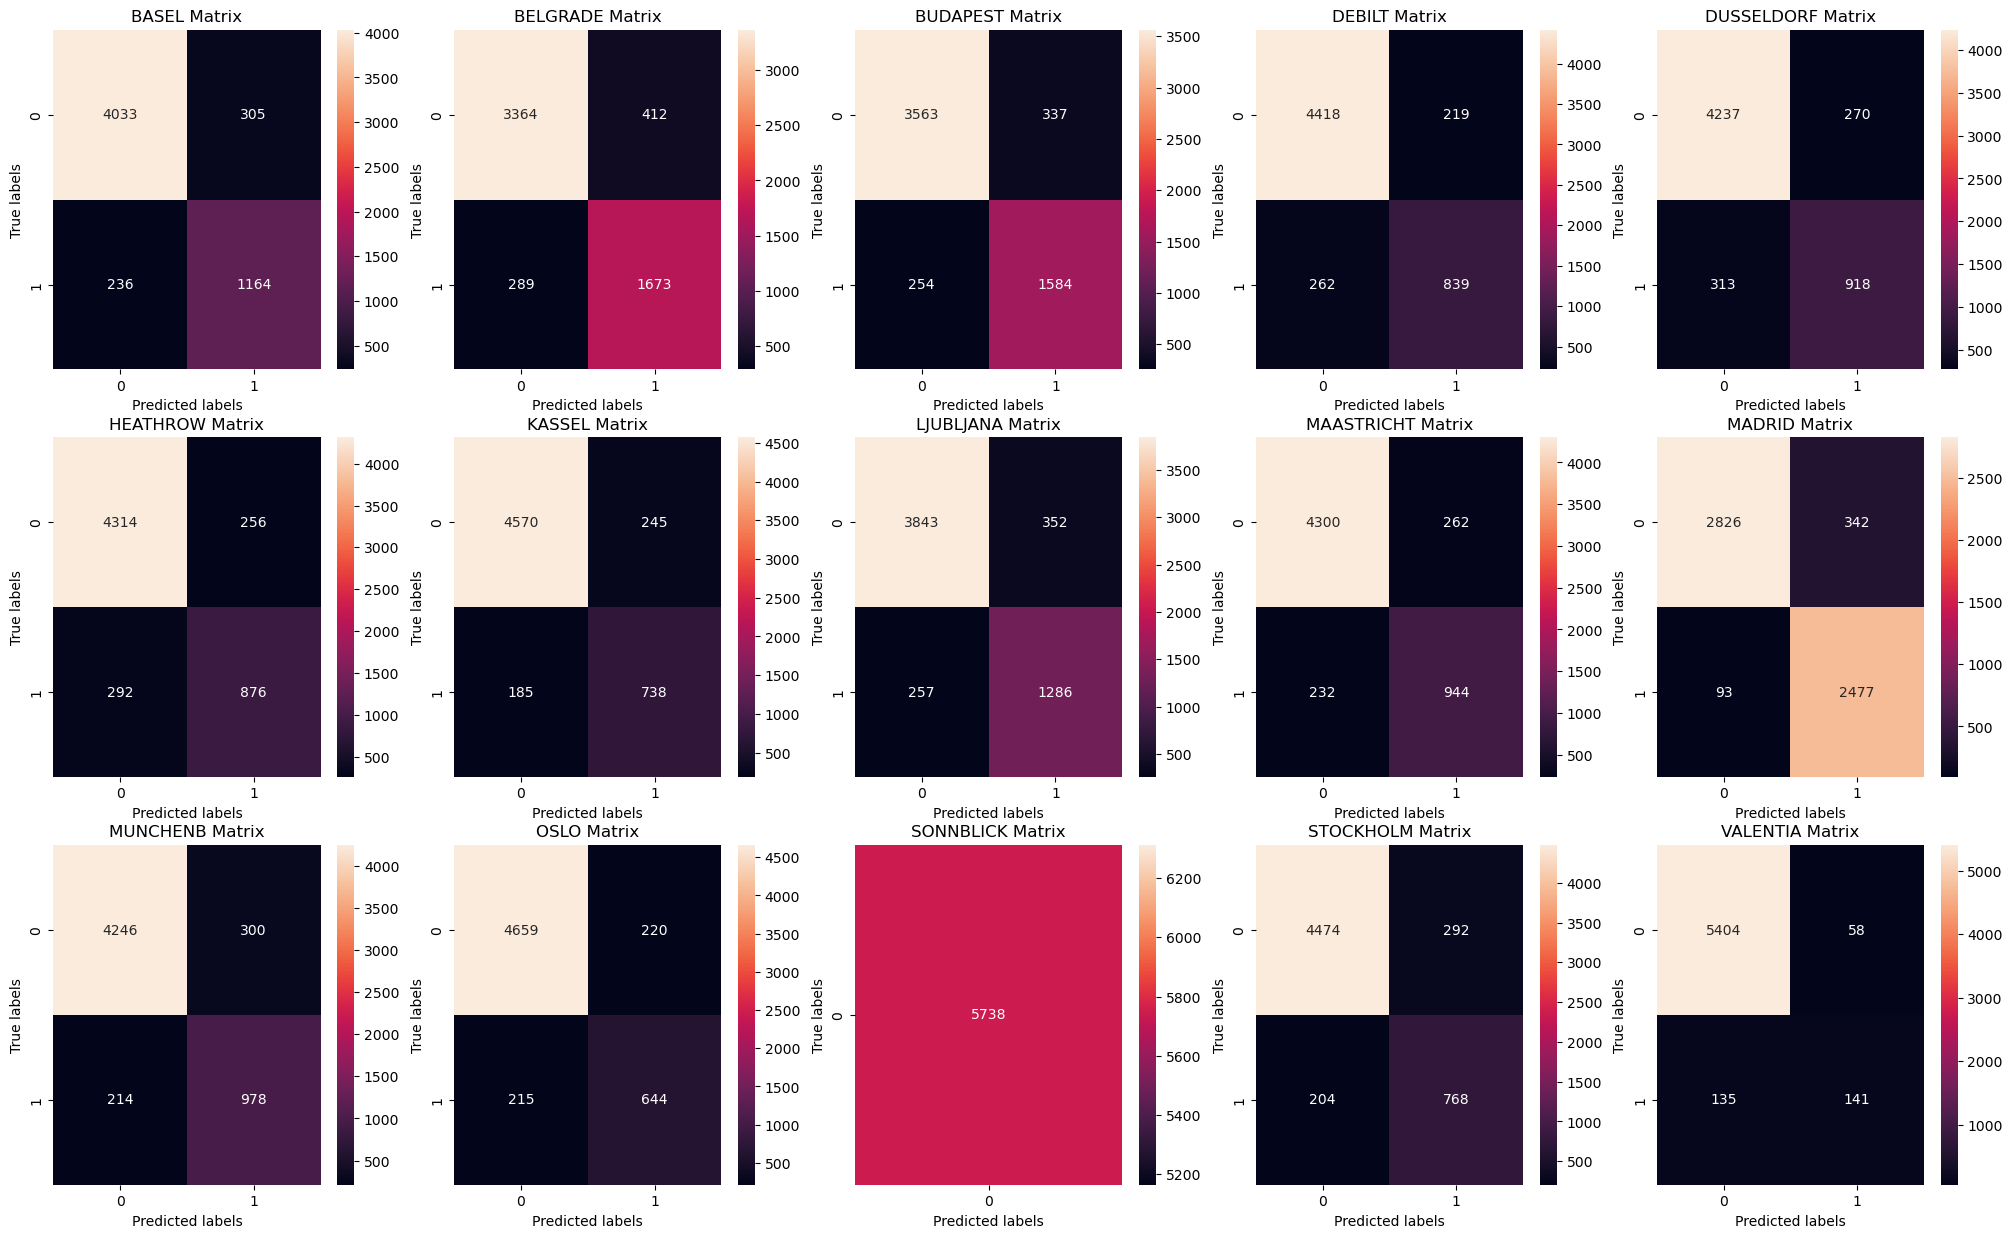

In [39]:
#Confusion matrix for Test data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 6.2. Iteration Run 2: hidden_layer_sizes=(200, 200, 200), max_iter=1000, tol=0.00001

In [42]:
#Create the AN
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=1000, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=1000, tol=1e-05)

In [43]:
y_pred = mlp.predict(X_train_df)
print('Train accuracy score: ', accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print('Test accuracy score: ', accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.8817685335812224
Test accuracy score:  0.48919484140815617


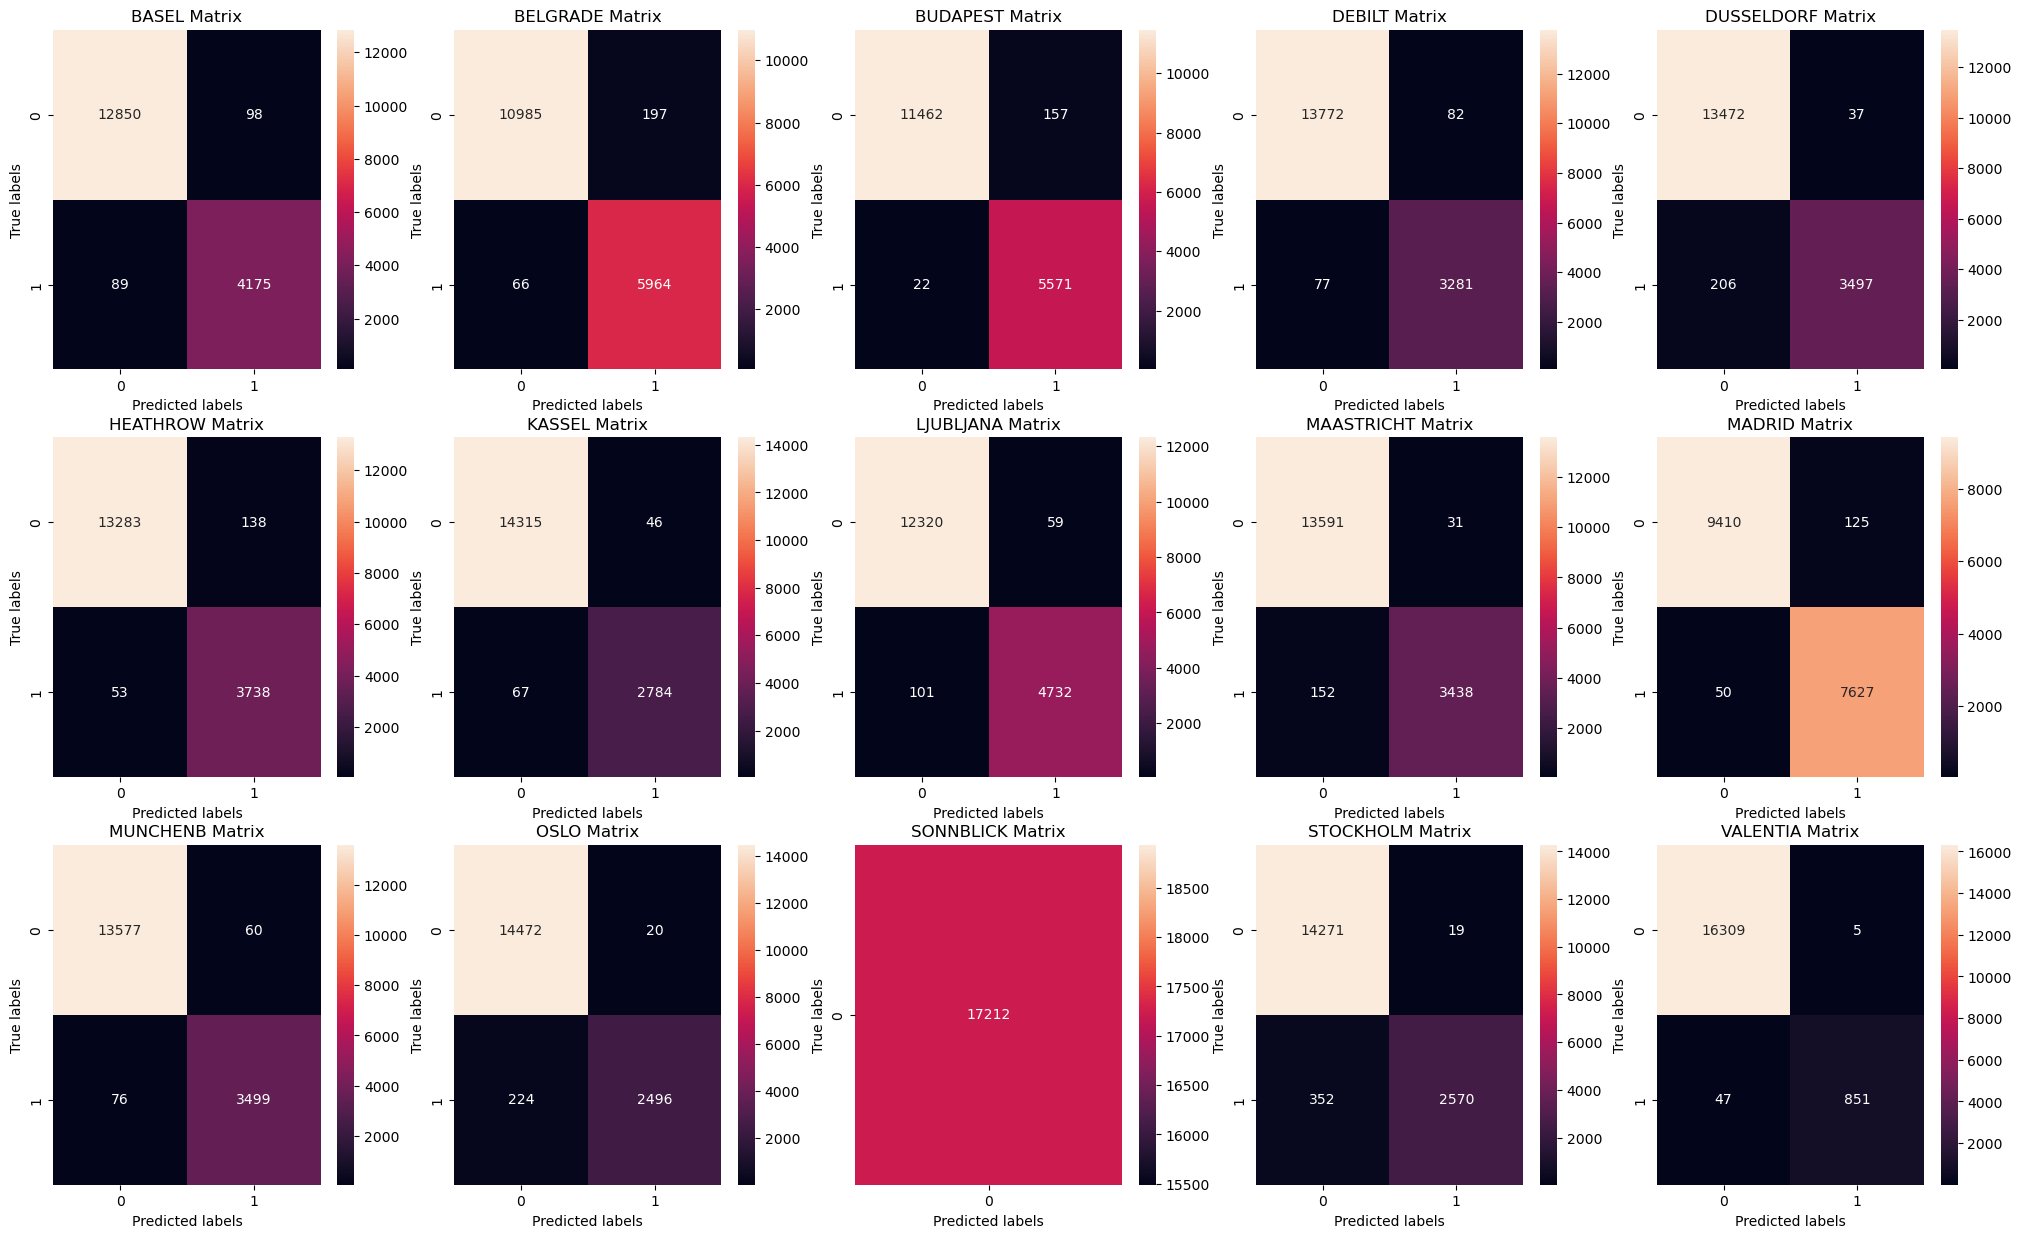

In [44]:
#Confusion matrix based Training data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

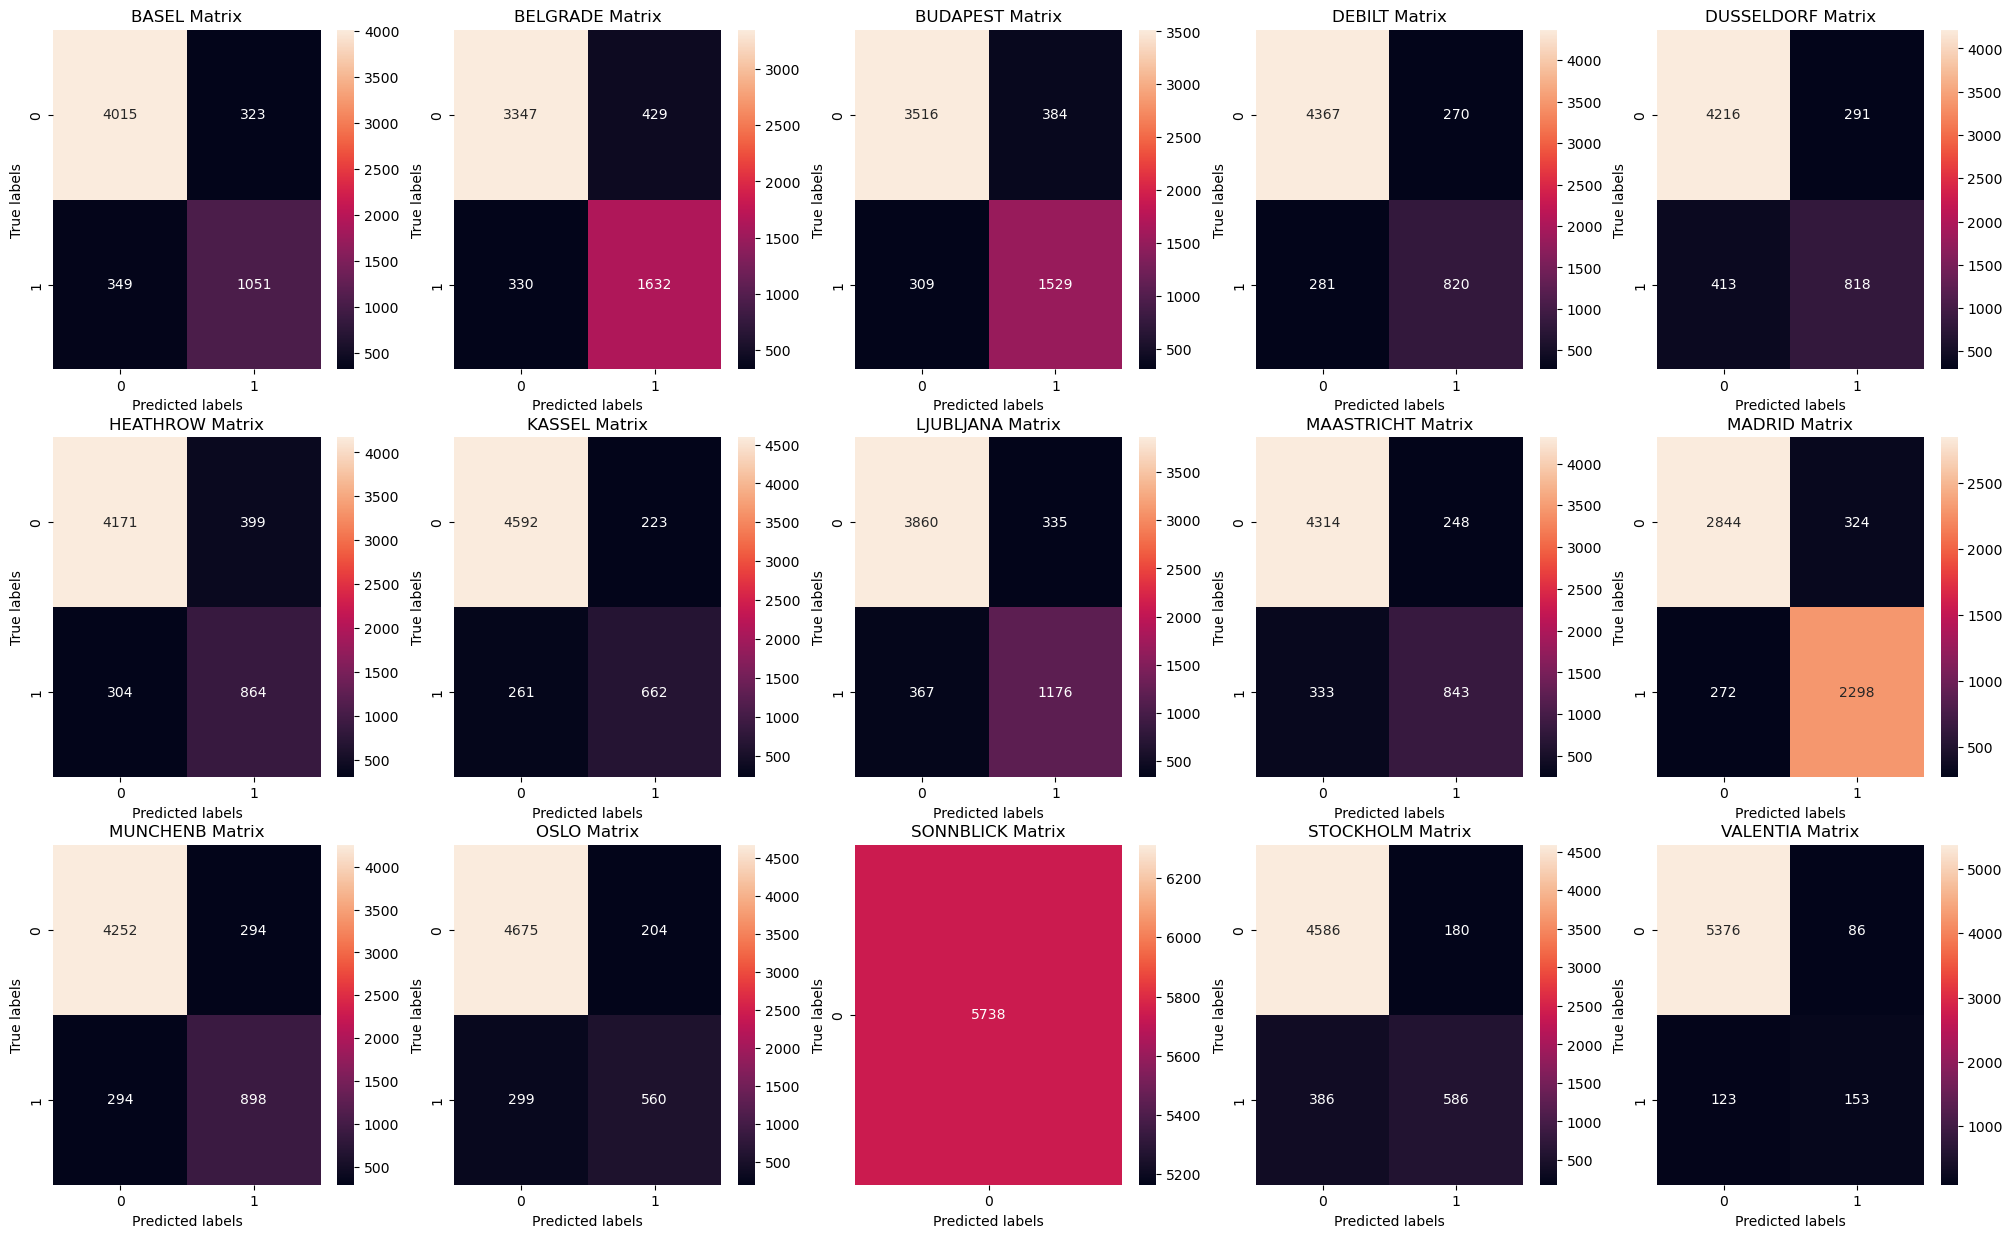

In [45]:
#Confusion matrix for Test data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 6.2. Iteration Run 3: hidden_layer_sizes=(100, 200, 20), max_iter=5000, tol=0.0001

In [76]:
#Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 20), max_iter=5000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(100, 200, 20), max_iter=5000)

In [77]:
y_pred = mlp.predict(X_train_df)
print('Train accuracy score: ', accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_df)
print('Test accuracy score: ', accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.6324657215895887
Test accuracy score:  0.5019170442662949


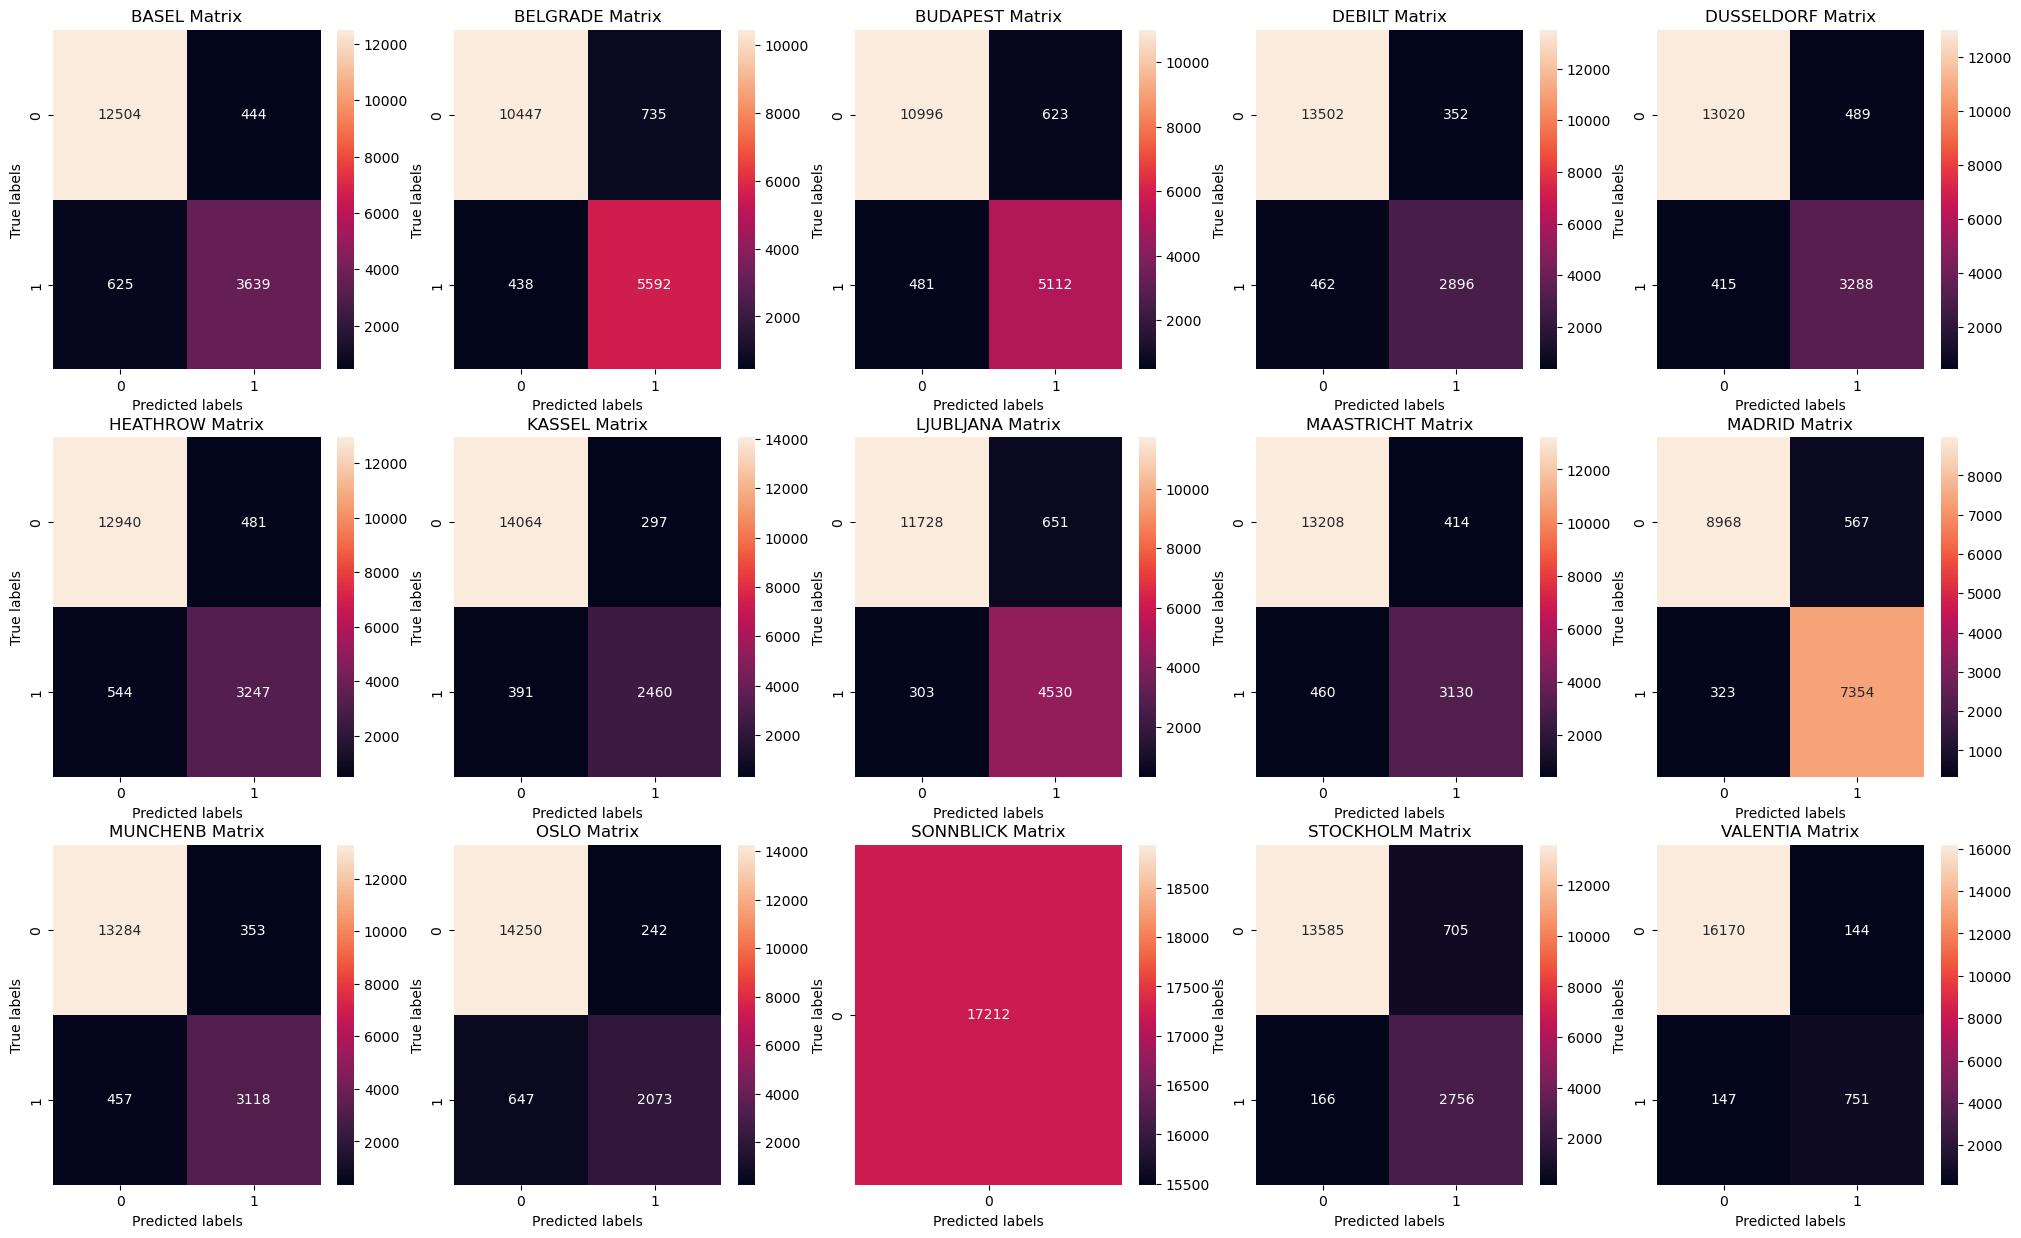

In [78]:
#Confusion matrix based Training data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

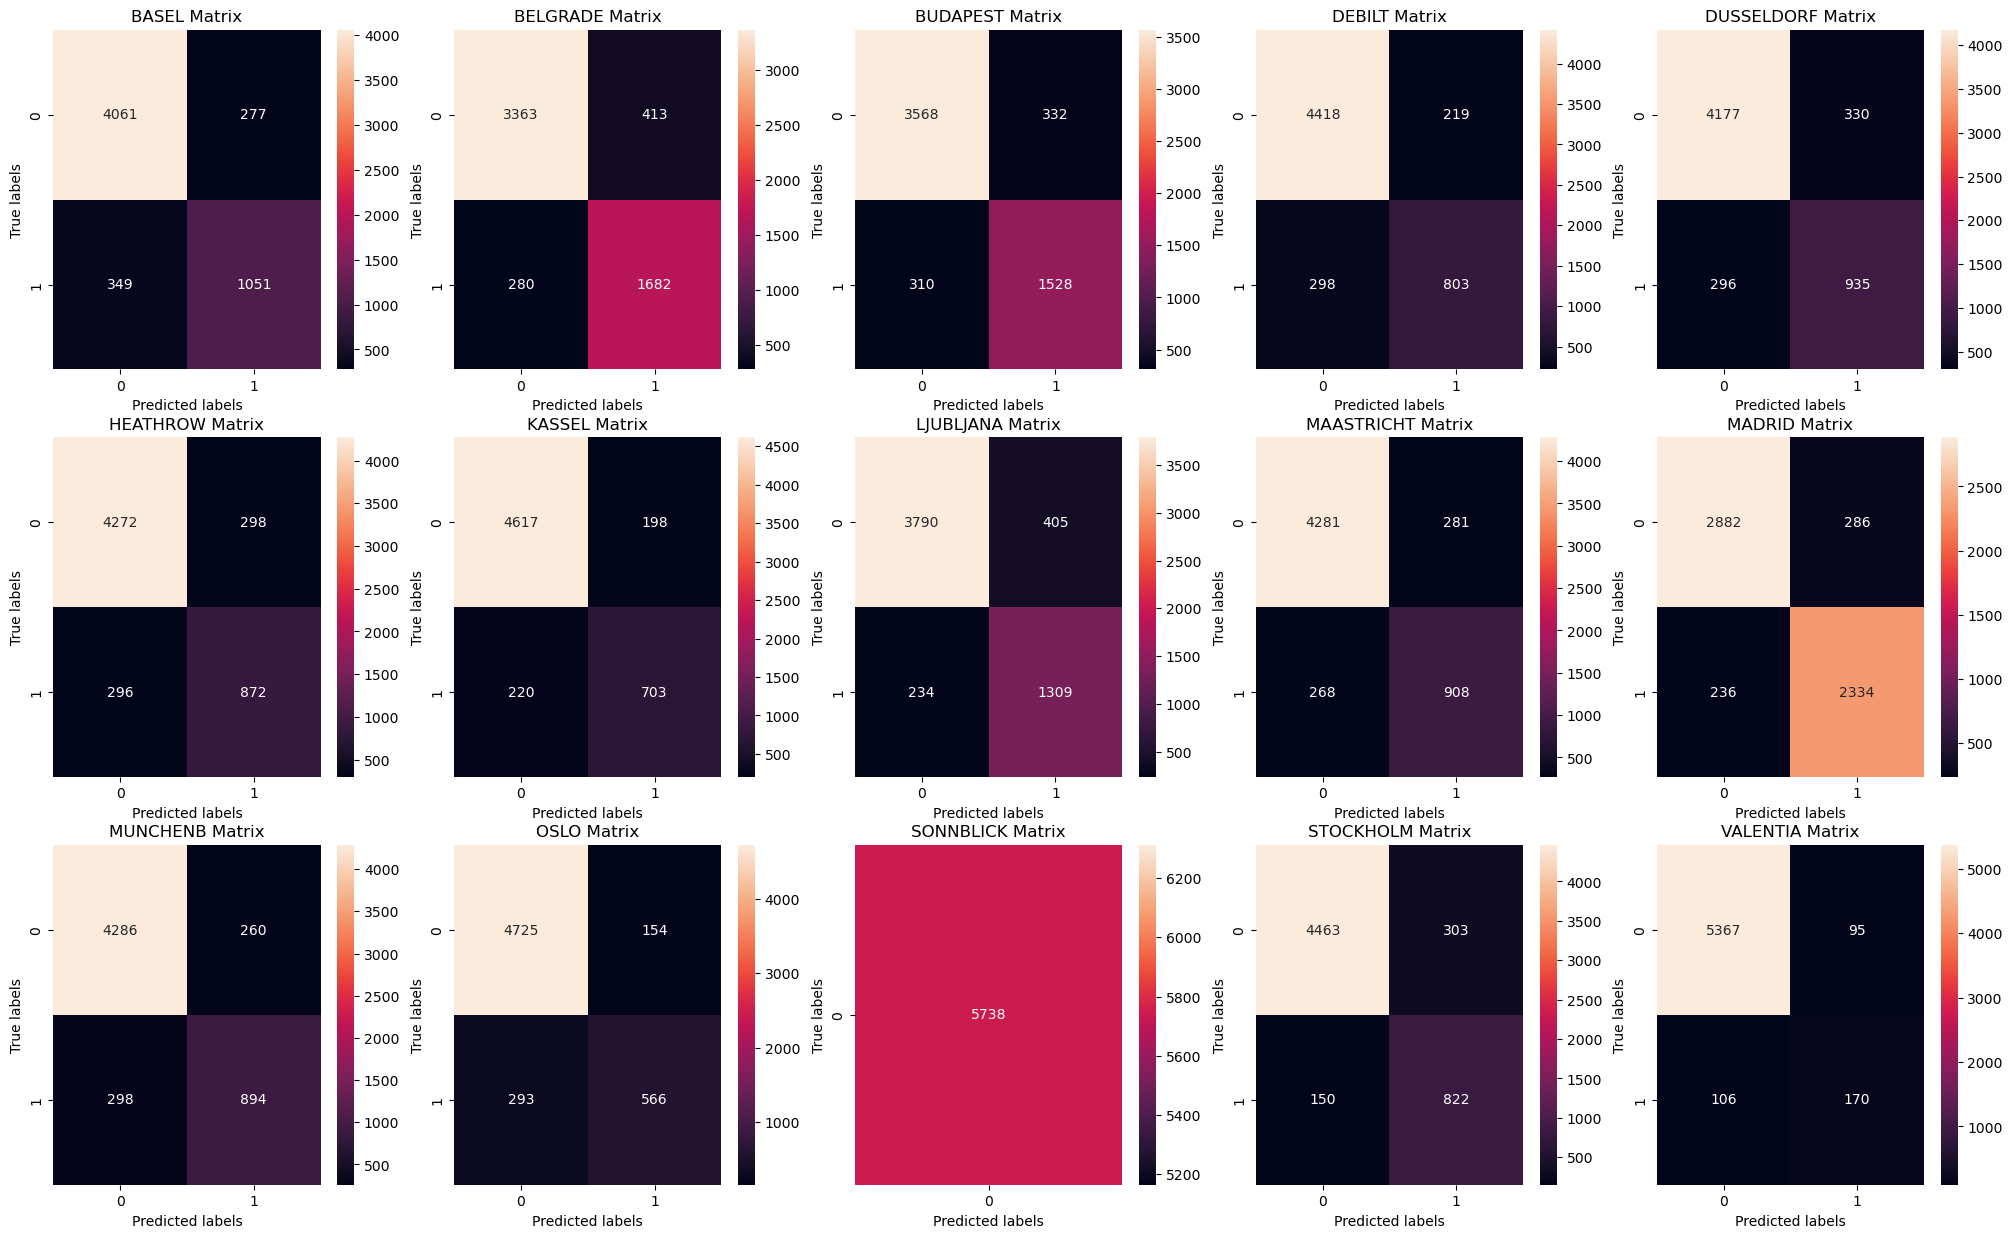

In [79]:
#Confusion matrix for Test data
locations = list({x.split("_")[0] for x in df_cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1